In [1]:
# Load data
from contradictory_claims.models.evaluate_model import read_data_from_excel


roam_path = "/Users/dnsosa/Downloads/Coronawhy-Contra-Claims-Scaling-v2-annotated-2020-10-21.xlsx"
roam_data = read_data_from_excel(roam_path, "Docs")

Length of DF: 1002
Dropped NAs. Resulting length of DF: 996


In [2]:
def process_text(s):
    s = s.replace("Claim1:\n\n", "")
    return s.split("\n\nClaim2:\n\n")

def normalize_tags(s):
    s = s.replace("STRICT_", "")
    return s.lower()

##df['example'] = df['text'].apply(process_text)

roam_data['label'] = roam_data['tags'].apply(normalize_tags)
roam_data = roam_data[~roam_data['label'].str.contains("question|duplicate")]

In [3]:
def splitter(in_str, index):
    text1 = in_str.rstrip().split("\n\n")[index]
    return text1

roam_data["text1"] = roam_data.text.transform(lambda x: splitter(x, 1))
roam_data["text2"] = roam_data.text.transform(lambda x: splitter(x, 3))

In [4]:
roam_data.head(10)

,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid,label,text1,text2
0,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nchloroquine has been recommended by...,323,rc5bn6jc,sdij1d90,neutral,chloroquine has been recommended by some autho...,on the basis of hydroxychloroquine's superior ...
1,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\n15 our regression model identified ...,413,36amafub,rirbffi6,neutral,15 our regression model identified age as a de...,these findings formed the basis of a recent ra...
2,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nn/a fax: +90 322 458 88 54 inhibiti...,431,1emlkii0,27f9241x,neutral,n/a fax: +90 322 458 88 54 inhibition of the r...,we observed weak but beneficial class effects ...
3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin addition, a case report showed t...",97,iua7twk5,1mjaycee,entailment,"in addition, a case report showed that remdesi...","remdesivir, lopinavir, ritonavir, and oseltami..."
4,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nfurthermore, despite the favorable ...",14,v17l6t5u,kmzum2a9,entailment,"furthermore, despite the favorable outcomes of...",it is important to underline that the immunomo...
5,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nword count: 248 take home: this stu...,967,2f6nj4to,n6juf8tw,contradiction,word count: 248 take home: this study demonstr...,"similarly, a report from france with 181 patie..."
6,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nonly in one patient was treatment s...,954,rqjzl8js,sdij1d90,neutral,"only in one patient was treatment stopped, due...",on the basis of hydroxychloroquine's superior ...
7,NEUTRAL,Demo-Annotations_43573ac3-R1,"Claim1:\n\nto date, data about the use of toci...",594,3od9m8gh,e5hi63rm,neutral,"to date, data about the use of tocilizumab in ...",we report herein our experience regarding the ...
9,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nthe role of convalescent plasma tra...,790,6kn4mr04,t6w7p90m,neutral,the role of convalescent plasma transfusion an...,"remdesivir, an adenosine analog that incorpora..."
10,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\n12, 13 the findings of our study ar...",371,yxuzc18x,7qdjea6f,entailment,"12, 13 the findings of our study are similar t...",our findings suggest that patients treated by ...


In [5]:
len(set(roam_data.text1).intersection(set(roam_data.text2)))

167

In [6]:
len(set(roam_data.paper1_cord_uid).intersection(set(roam_data.paper2_cord_uid)))

135

In [7]:
roam_data = roam_data.reset_index()
roam_data.head(10)

,index,tags,source,text,row_id,paper1_cord_uid,paper2_cord_uid,label,text1,text2
0,0,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nchloroquine has been recommended by...,323,rc5bn6jc,sdij1d90,neutral,chloroquine has been recommended by some autho...,on the basis of hydroxychloroquine's superior ...
1,1,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\n15 our regression model identified ...,413,36amafub,rirbffi6,neutral,15 our regression model identified age as a de...,these findings formed the basis of a recent ra...
2,2,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nn/a fax: +90 322 458 88 54 inhibiti...,431,1emlkii0,27f9241x,neutral,n/a fax: +90 322 458 88 54 inhibition of the r...,we observed weak but beneficial class effects ...
3,3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin addition, a case report showed t...",97,iua7twk5,1mjaycee,entailment,"in addition, a case report showed that remdesi...","remdesivir, lopinavir, ritonavir, and oseltami..."
4,4,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nfurthermore, despite the favorable ...",14,v17l6t5u,kmzum2a9,entailment,"furthermore, despite the favorable outcomes of...",it is important to underline that the immunomo...
5,5,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nword count: 248 take home: this stu...,967,2f6nj4to,n6juf8tw,contradiction,word count: 248 take home: this study demonstr...,"similarly, a report from france with 181 patie..."
6,6,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nonly in one patient was treatment s...,954,rqjzl8js,sdij1d90,neutral,"only in one patient was treatment stopped, due...",on the basis of hydroxychloroquine's superior ...
7,7,NEUTRAL,Demo-Annotations_43573ac3-R1,"Claim1:\n\nto date, data about the use of toci...",594,3od9m8gh,e5hi63rm,neutral,"to date, data about the use of tocilizumab in ...",we report herein our experience regarding the ...
8,9,NEUTRAL,Demo-Annotations_43573ac3-R1,Claim1:\n\nthe role of convalescent plasma tra...,790,6kn4mr04,t6w7p90m,neutral,the role of convalescent plasma transfusion an...,"remdesivir, an adenosine analog that incorpora..."
9,10,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\n12, 13 the findings of our study ar...",371,yxuzc18x,7qdjea6f,entailment,"12, 13 the findings of our study are similar t...",our findings suggest that patients treated by ...


In [8]:
import networkx as nx

G = nx.Graph()
for i in range(len(roam_data)):
    n1, n2, label = roam_data.loc[i, ["paper1_cord_uid", "paper2_cord_uid", "label"]]
    G.add_edge(n1, n2, label=label)
    
    #print(n1)

In [9]:
import networkx as nx

G = nx.Graph()
for i in range(len(roam_data)):
    n1, n2, label = roam_data.loc[i, ["text1", "text2", "label"]]
    G.add_edge(n1, n2, label=label)
    
    #print(n1)

In [10]:
G.number_of_edges()

956

In [23]:
lcc = G.subgraph(max(nx.connected_components(G), key=len))
scc = G.subgraph(min(nx.connected_components(G), key=len))

In [24]:
lcc.edges

EdgeView([('chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.', "on the basis of hydroxychloroquine's superior antiviral and prophylactic activity, as well as its more tolerable safety profile in comparison to chloroquine, we believe that hydroxychloroquine may be a promising drug for the treatment of sars-cov-2 infection [24] ."), ('chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.', 'concurrent administration of some drugs should avoided including drugs which can prolong qt interval (examples: quinolones, macrolides, ondansetron), anti-arrhythmic, anti-depressant and antipsychotic drugs. the italian society of infectious and tropical disease, lombardy section suggests administration of chloroquine (500 mg, twice a 

In [25]:
lcc_labs = list(nx.get_edge_attributes(lcc, 'label').values())
scc_labs = list(nx.get_edge_attributes(scc, 'label').values())

In [11]:
freq = {} 
for items in lcc_labs: 
    freq[items] = lcc_labs.count(items) 

for key, value in freq.items(): 
    print (key, value)

NameError: name 'lcc_labs' is not defined

In [27]:
freq = {} 
for items in scc_labs: 
    freq[items] = scc_labs.count(items) 

for key, value in freq.items(): 
    print (key, value)

neutral 88
entailment 37
contradiction 5


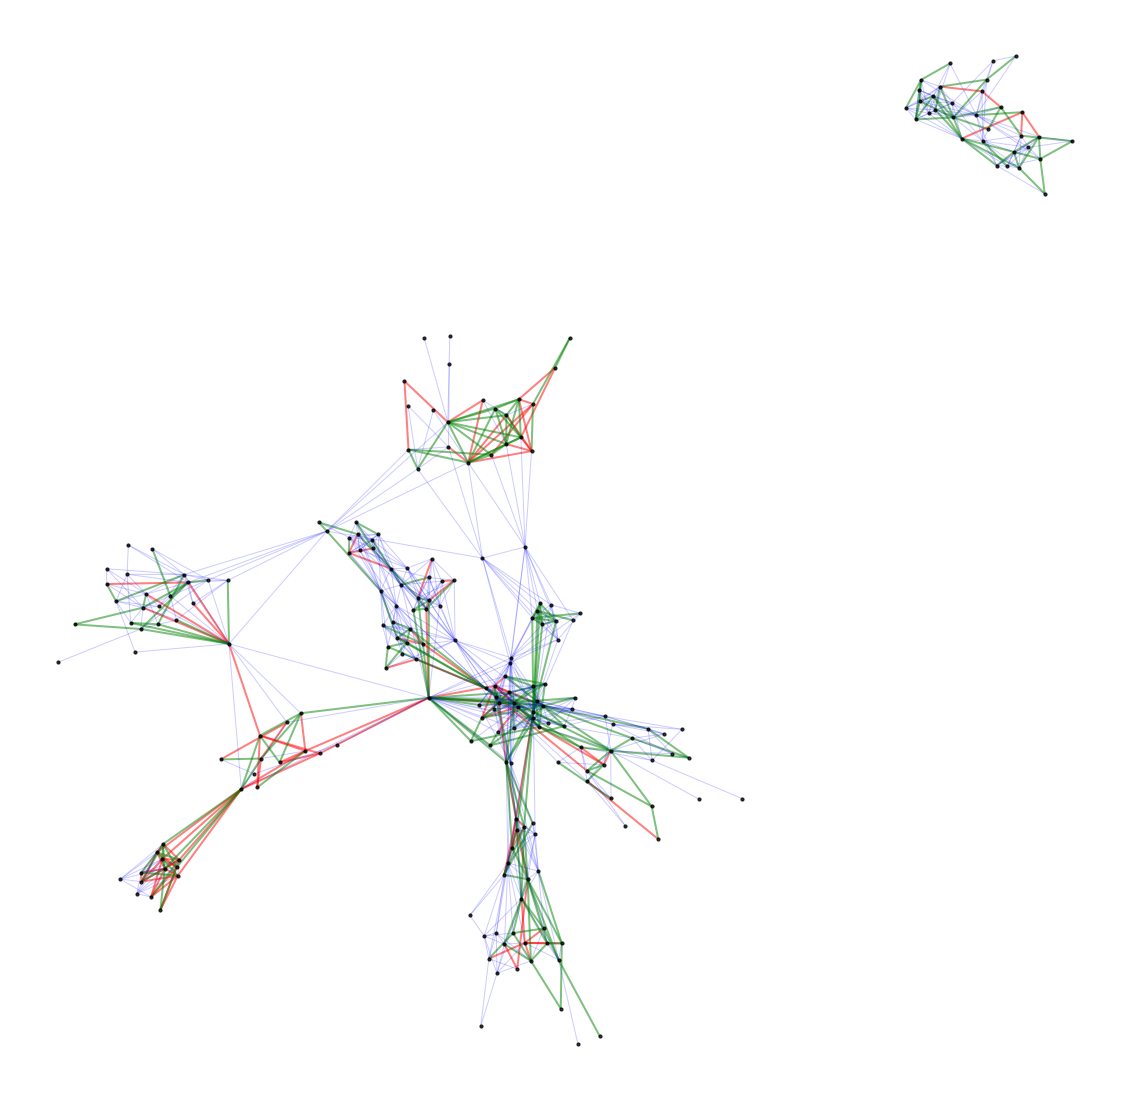

In [12]:
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('figure', figsize=(20, 20))


#G=nx.cubical_graph()
pos=nx.spring_layout(G) # positions for all nodes

e_con=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "contradiction"]
e_neu=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "neutral"]
e_ent=[(u,v) for (u,v,d) in G.edges(data=True) if d['label'] == "entailment"]

# nodes
nx.draw_networkx_nodes(G,pos,node_color='black',node_size=10, alpha=0.8)

# edges
nx.draw_networkx_edges(G, pos, edgelist=e_con, edge_color='r', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_ent, edge_color='g', width=2.0, alpha=0.5)
nx.draw_networkx_edges(G, pos, edgelist=e_neu, edge_color='b', width=1.0, alpha=0.2)

#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(0,1),(1,2),(2,3),(3,0)],
#                       width=8,alpha=0.5,edge_color='r')
#nx.draw_networkx_edges(G,pos,
#                       edgelist=[(4,5),(5,6),(6,7),(7,4)],
#                       width=8,alpha=0.5,edge_color='b')


plt.axis('off')
plt.show() # display

In [13]:
G.number_of_edges()

956

In [51]:
import cvxpy as cp
import cvxopt
import numpy as np

n_E = G.number_of_edges()

idx2edge = {}
edge2idx = {}
i = 0
for edge in G.edges():
    idx2edge[i] = edge
    edge2idx[edge] = i
    i += 1

f_R = .5  # fraction train
f_L = .25  # fraction val
f_T = .25  # fraction test

x_R = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Train
x_L = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Val
x_T = cp.Variable(n_E, boolean=True) # indicator that x_ij got assigned to Test
y = cp.Variable((n_E, n_E), boolean=True) # indicator that two adjacent edges, e_ij and e_kl, are assigned to diff groups

constraints = []

# All edges assigned to exaclty one group:
constraints += [x_R + x_L + x_T == np.ones(n_E)]

# Each group has fixed size
n_R = np.floor(f_R * n_E)
n_L = np.floor(f_L * n_E)
n_T = n_E - n_R - n_L

constraints += [
    cp.sum(x_R) == n_R,
    cp.sum(x_L) == n_L,
    cp.sum(x_T) == n_T
]

ct = 0
# Y is updated based on the group assignments
for ij in G.edges():
    for kl in G.edges():
        if len(set([ij[0], ij[1], kl[0], kl[1]])) == 3: # Are these two edges adjacent? 
            
            ct += 1
            ij_idx = edge2idx[ij]
            kl_idx = edge2idx[kl]
            
            # New equations to add
            constraints += [
                x_R[ij_idx] - x_R[kl_idx] <= y[ij_idx, kl_idx],
                x_R[kl_idx] - x_R[ij_idx] <= y[ij_idx, kl_idx],
                x_L[ij_idx] - x_L[kl_idx] <= y[ij_idx, kl_idx],
                x_L[kl_idx] - x_L[ij_idx] <= y[ij_idx, kl_idx],
                x_T[ij_idx] - x_T[kl_idx] <= y[ij_idx, kl_idx],
                x_T[kl_idx] - x_T[ij_idx] <= y[ij_idx, kl_idx]
            ]
            
objective = cp.Minimize(cp.sum(y))
prob = cp.Problem(objective, constraints)

print(ct)

19586


In [ ]:
prob.solve(solver = "GLPK_MI")

In [19]:
# THE RELAXATION!!
import cvxpy as cp
import cvxopt
import numpy as np

n_E = G.number_of_edges()

idx2edge = {}
edge2idx = {}
i = 0
for edge in G.edges():
    idx2edge[i] = edge
    edge2idx[edge] = i
    i += 1

f_R = .5  # fraction train
f_L = .25  # fraction val
f_T = .25  # fraction test

x_R = cp.Variable(n_E) # indicator that x_ij got assigned to Train
x_L = cp.Variable(n_E) # indicator that x_ij got assigned to Val
x_T = cp.Variable(n_E) # indicator that x_ij got assigned to Test
y = cp.Variable((n_E, n_E)) # indicator that two adjacent edges, e_ij and e_kl, are assigned to diff groups

constraints = []

# All edges assigned to exaclty one group:
constraints += [x_R + x_L + x_T == np.ones(n_E)]

# Each group has fixed size
n_R = np.floor(f_R * n_E)
n_L = np.floor(f_L * n_E)
n_T = n_E - n_R - n_L

constraints += [
    cp.sum(x_R) == n_R,
    cp.sum(x_L) == n_L,
    cp.sum(x_T) == n_T
]

ct = 0
# Y is updated based on the group assignments
for ij in G.edges():
    for kl in G.edges():
        if len(set([ij[0], ij[1], kl[0], kl[1]])) == 3: # Are these two edges adjacent? 
            
            ct += 1
            ij_idx = edge2idx[ij]
            kl_idx = edge2idx[kl]
            
            # New equations to add
            constraints += [
                x_R[ij_idx] - x_R[kl_idx] <= y[ij_idx, kl_idx],
                x_R[kl_idx] - x_R[ij_idx] <= y[ij_idx, kl_idx],
                x_L[ij_idx] - x_L[kl_idx] <= y[ij_idx, kl_idx],
                x_L[kl_idx] - x_L[ij_idx] <= y[ij_idx, kl_idx],
                x_T[ij_idx] - x_T[kl_idx] <= y[ij_idx, kl_idx],
                x_T[kl_idx] - x_T[ij_idx] <= y[ij_idx, kl_idx]
            ]
            
# Range of permissible assignments (relaxation)
constraints += [
    x_R <= np.ones(n_E),
    x_R >= np.zeros(n_E),
    x_L <= np.ones(n_E),
    x_L >= np.zeros(n_E),
    x_T <= np.ones(n_E),
    x_T >= np.zeros(n_E),
    y <= np.ones((n_E, n_E)),
    y >= np.zeros((n_E, n_E))
]

objective = cp.Minimize(cp.sum(y))
prob = cp.Problem(objective, constraints)

print(ct)

19586


In [ ]:
##prob.solve(solver = "GLPK_MI")

prob.solve()

In [ ]:
if prob.status not in ["infeasible", "unbounded"]:
    # Otherwise, problem.value is inf or -inf, respectively.
    print("Optimal value: %s" % prob.value)
for variable in prob.variables():
    print("Variable %s: value %s" % (variable.name(), variable.value))

In [ ]:
np.max(prob.variables()[0].value)

In [44]:
###og_prob = prob

In [ ]:
print("Hello")